## Stage 2
The goal of Stage II is to develop the data for modeling and comparative analysis. Here you will be comparing how US is doing with other countries in COVID cases and deaths. And you will be also analysing county based information for different states in the US. Since COVID dataset is huge, we will focus the analysis on selected dates, starts from 2020, July - 2020, December. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as stats
import scipy
import statistics

In [2]:
cases = pd.read_csv("../covid_confirmed_usafacts.csv")
deaths = pd.read_csv("../covid_deaths_usafacts.csv")
pop = pd.read_csv("../Full_Covid_Data.csv")

### Member tasks
- Generate weekly statistics (mean, median, mode) for number of cases and deaths across a specific "state". 

In [3]:
# Functions for state stuffs
def parse_datetime_state(full_data, state):
    #get date range for chosen state
    state_data = full_data[full_data['State'] == state]
    dates_only = state_data.loc[:, '2020-07-05':'2020-12-27']
    #convert to datetime
    dates_only.columns = pd.to_datetime(dates_only.columns)
    return dates_only

def get_statistics(data_dates):
    weeks = [range(i, i+7) for i in range(0, len(data_dates.columns)-7, 7)]
    stats = pd.DataFrame({'week': [], 'mean' : [], 'median' : [], 'mode' : []})
    
    for w in range(len(weeks)) :
        week_start = data_dates.iloc[0, weeks[w]].keys()[0]
        week_sum = data_dates.iloc[:, weeks[w]].sum(axis=1)
        stats_row = pd.DataFrame({'week': week_start, 'mean' : week_sum.mean(), 'median' : week_sum.median(), 'mode' : week_sum.mode()})
        stats = pd.concat([stats, stats_row])
    return stats

In [4]:
state = 'SC'
norm_factor = 10000

pop_SC = pop.loc[pop["State"] == state]
pop_SC = pop_SC['population'].sum()

cases_dates_SC = parse_datetime_state(cases, state)
deaths_dates_SC = parse_datetime_state(deaths, state)
cases_stats_SC = get_statistics(cases_dates_SC)
deaths_stats_SC = get_statistics(deaths_dates_SC)
cases_norm = ((cases_dates_SC/(pop_SC/norm_factor)).sum(axis = 0) + 1).agg(np.log10)
deaths_norm = ((deaths_dates_SC/(pop_SC/norm_factor)).sum(axis = 0) + 1).agg(np.log10)

<Axes: title={'center': 'Cases across SC'}>

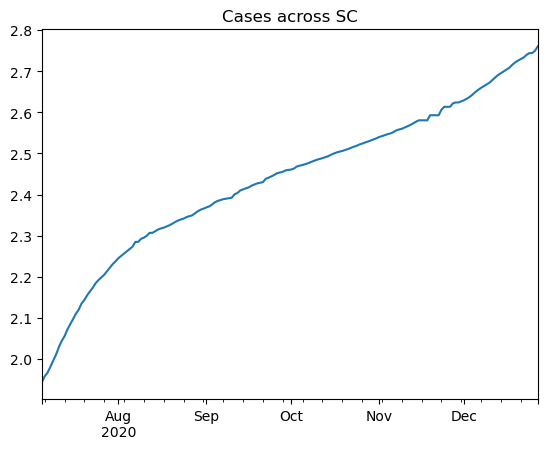

In [5]:
cases_norm.plot(title = ("Cases across " + state))

<Axes: title={'center': 'Deaths across SC'}>

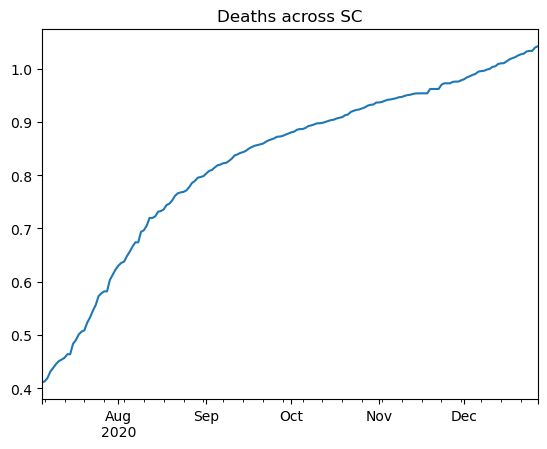

In [6]:
deaths_norm.plot(title = ("Deaths across " + state))

- Compare the data against other states (compare against 5 states). Normalize by population, use a normalization factor which is able to identify cases and deaths, for example try per 10,000 or 100,000 (this depends on the population). Plot the values across the weeks in a line plot for the 5 states in a single graph. Describe why the rates differ across these states in the notebook. Identify the peaks, do they compare with the US pattern?

In [7]:
# Normalize and plot all 50 states (optional; I used this to find state with highest infection/death rates)

# all at once (beware of overlapping colors)
#states5 = ["CA", "TX", "FL", "NY", "PA", "IL", "OH", "GA", "NC", "MI", "NJ", "VA", "WA", "AZ", "TN", "MA", "IN", "MO", "MD", "WI", "CO", "MN", "SC", "AL", "LA", "KY", "OR", "OK", "CT", "UT", "IA", "NV", "AR", "KS", "MS", "NM", "NE", "ID", "WV", "HA", "NH", "ME", "MT", "RI", "DE", "SD", "ND", "AK", "VT", "WY"]

# or 10 at a time (colors shouldn't overlap here. In order of population)
#states5 = ["CA", "TX", "FL", "NY", "PA", "IL", "OH", "GA", "NC", "MI"]
#states5 = ["NJ", "VA", "WA", "AZ", "TN", "MA", "IN", "MO", "MD", "WI"]
#states5 = ["CO", "MN", "SC", "AL", "LA", "KY", "OR", "OK", "CT", "UT"]
#states5 = ["IA", "NV", "AR", "KS", "MS", "NM", "NE", "ID", "WV", "HA"]
#states5 = ["NH", "ME", "MT", "RI", "DE", "SD", "ND", "AK", "VT", "WY"]

In [8]:
states5 = ["ND", "CO", "CA", "VT", "UT"]

cases_dates_s = []
deaths_dates_s = []
cases_norm = []
deaths_norm = []
norm_factor = 1000

# normalize, then pass to parse_datetime_state(full_data, state) and get_statistics(data_dates)
for i in range(len(states5)) :
    #get population data
    pop_s = pop.loc[pop["State"] == states5[i]]
    pop_s = sum(pop_s["population"])
    cases_dates_s.append(parse_datetime_state(cases, states5[i]))
    deaths_dates_s.append(parse_datetime_state(deaths, states5[i]))
    deaths_norm.append(((deaths_dates_s[i]/(pop_s/norm_factor)).sum(axis = 0) + 1).agg(np.log10))
    cases_norm.append(((cases_dates_s[i]/(pop_s/norm_factor)).sum(axis = 0) + 1).agg(np.log10))

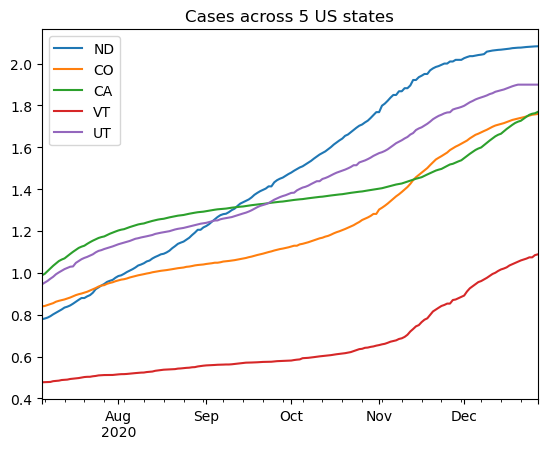

In [9]:
for i in range(len(states5)) :
    cases_norm[i].plot(title = ("Cases across " + str(len(states5)) + " US states"))
plt.legend(states5)

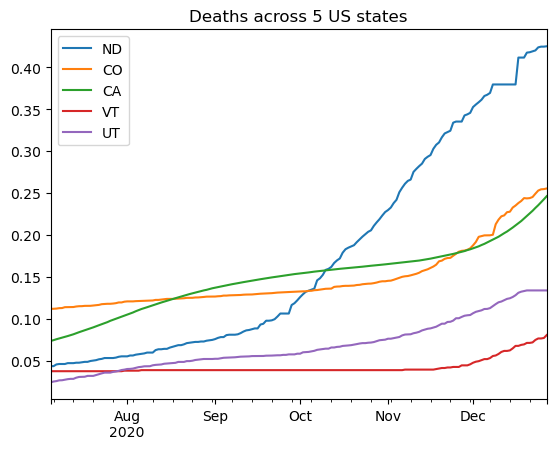

In [10]:
for i in range(len(states5)) :
    deaths_norm[i].plot(title = ("Deaths across " + str(len(states5)) + " US states"))
plt.legend(states5)

Because of their high populations, Colorado and California, despite having higher numbers of infections, have a lower rate of infection by December, compared to North Dakota and Utah. Vermont had an extremely low number of cases for its population, so its infections per capita rate is also really low. All peaks for each state match up with the country-wide data.

#### Identify five counties within a state of your choice with high cases and death rates. 

In [11]:
state = "NJ"
counties5 = ["Bergen County", "Essex County", "Hudson County", "Middlesex County", "Passaic County"] #NEWWW JERSAYYY
newj = pop.loc[pop["State"] == state]
newj = newj['population'].sum()
norm_factor = 1000

In [12]:
# Get state data for comparison
nj_dates_c = (parse_datetime_state(cases, state))
nj_dates_d = (parse_datetime_state(deaths, state))
cases_norm = ((nj_dates_c/(newj/norm_factor)).sum(axis = 0) + 1).agg(np.log10)
deaths_norm = ((nj_dates_d/(newj/norm_factor)).sum(axis = 0) + 1).agg(np.log10)

<Axes: title={'center': 'Cases across NJ'}>

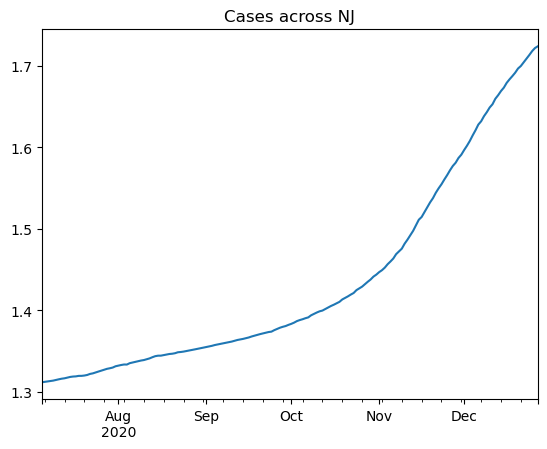

In [13]:
cases_norm.plot(title = ("Cases across " + state))

<Axes: title={'center': 'Deaths across NJ'}>

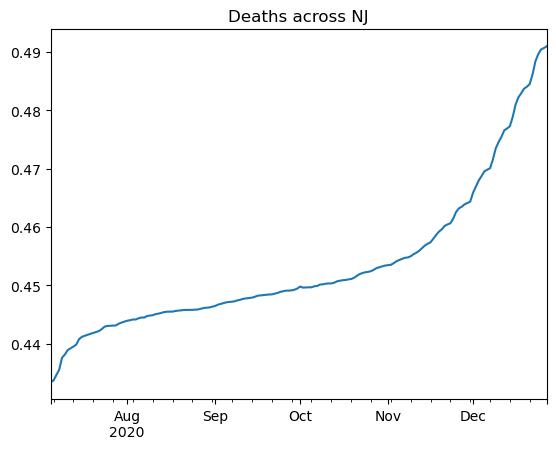

In [14]:
deaths_norm.plot(title = ("Deaths across " + state))

In [15]:
# Find which county has highest numbers of infections/deaths (interpret using alphabetized list of counties)

# Choose state_data for either cases or deaths:
state_data = cases.loc[cases['State'] == state]
#state_data = deaths.loc[deaths['State'] == state]
dates_only = state_data.loc[:, '2020-07-05':'2020-12-27']
countysums = dates_only.sum(axis = 1)
#countysums

#### Plot weekly trends (cases and deaths) for the top 5 infected counties. Show plots by raw values and log normalized values.

In [16]:
# Functions
def parse_datetime_county(full_data, state, county):
    # get date range for chosen county
    state_data = full_data.loc[full_data['State'] == state]
    county_data = state_data.loc[state_data['County Name'] == county]
    dates_only = county_data.loc[:, '2020-07-05':'2020-12-27']
    # convert to datetime
    dates_only.columns = pd.to_datetime(dates_only.columns)
    return dates_only

# Optional function to see county stats
def get_statistics_c(data, counties):
    stats = pd.DataFrame({'county': [], 'mean' : [], 'median' : [], 'mode' : []})
    stats_row = pd.DataFrame({'county': counties, 'mean' : np.mean(data, axis=1), 'median' : np.median(data, axis=1)})
    stats = pd.concat([stats, stats_row])
    return stats

In [17]:
cases_dates_c = []
deaths_dates_c = []
cases_norm = []
deaths_norm = []
#cases_stats_c = []
#deaths_stats_c = []

for i in range(len(counties5)) :
    # get population data
    pop_c = pop.loc[pop["State"] == state]
    pop_c = pop_c.loc[pop_c["County Name"] == (counties5[i])]
    pop_c = sum(pop_c["population"])
    cases_dates_c.append(parse_datetime_county(cases, state, (counties5[i] + " ")))
    deaths_dates_c.append(parse_datetime_county(deaths, state, (counties5[i] + " ")))
    deaths_norm.append(((deaths_dates_c[i]/(pop_c/norm_factor)).sum(axis = 0) + 1).agg(np.log10))
    cases_norm.append(((cases_dates_c[i]/(pop_c/norm_factor)).sum(axis = 0) + 1).agg(np.log10))
    #cases_stats_c.append(get_statistics_c(cases_dates_c[i], counties5[i]))
    #deaths_stats_c.append(get_statistics_c(deaths_dates_c[i], counties5[i]))
    
cases_dates = pd.concat(cases_dates_c, ignore_index = True)
deaths_dates = pd.concat(deaths_dates_c, ignore_index = True)
#cases_stats = pd.concat(cases_stats_c, ignore_index = True)
#deaths_stats = pd.concat(deaths_stats_c, ignore_index = True)

In [18]:
# Transpose raw data so it can be readable by plt
cases_dates = cases_dates.T
cases_dates.columns = counties5
deaths_dates = deaths_dates.T
deaths_dates.columns = counties5

#### Plot data by raw values

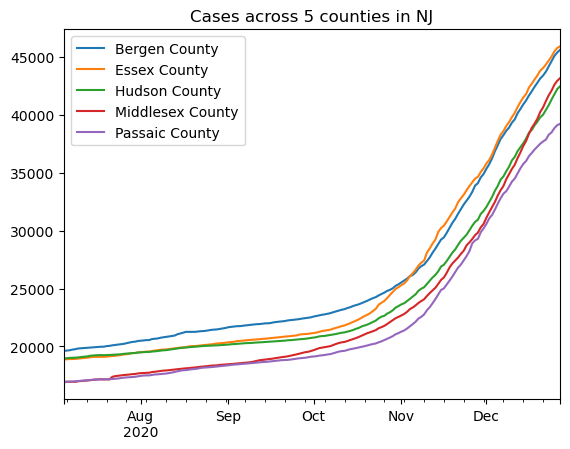

In [19]:
# raw
for i in range(len(counties5)) :
    cases_dates.loc[:,counties5[i]].plot(title = ("Cases across " + str(len(counties5)) + " counties in " + state))
plt.legend(counties5)

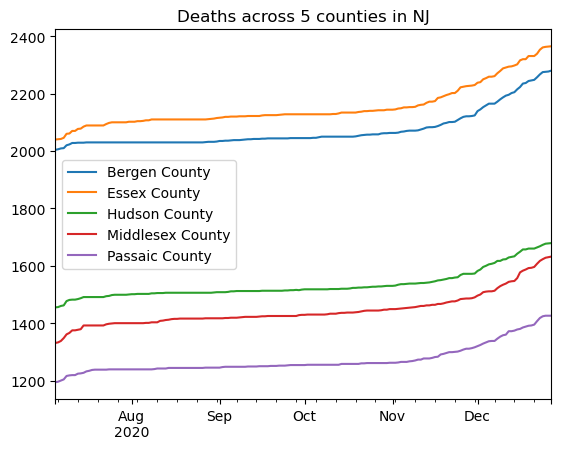

In [20]:
# raw
for i in range(len(counties5)) :
    deaths_dates.loc[:,counties5[i]].plot(title = ("Deaths across " + str(len(counties5)) + " counties in " + state))
plt.legend(counties5)

#### Plot data using normalized values

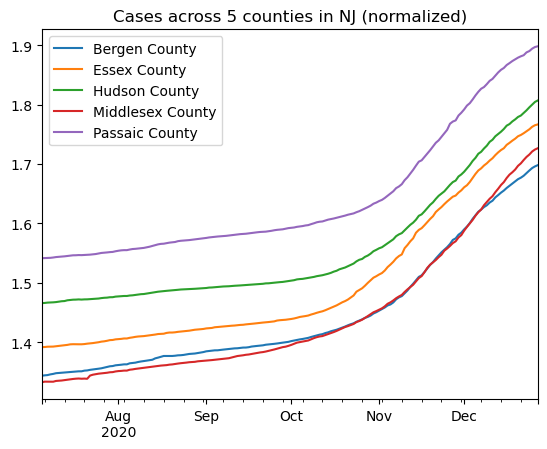

In [21]:
# normalized
for i in range(len(counties5)) :
    cases_norm[i].plot(title = ("Cases across " + str(len(counties5)) + " counties in " + state + " (normalized)"))
plt.legend(counties5)

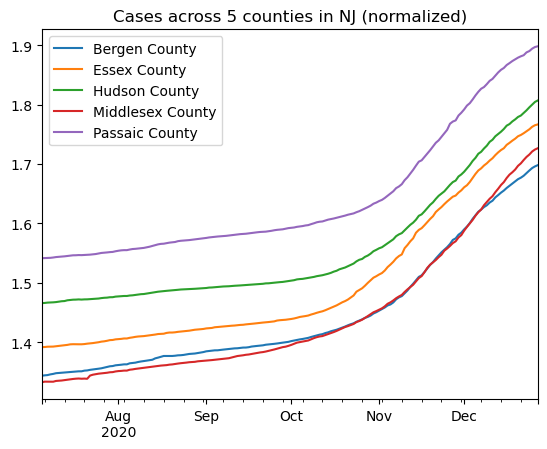

In [22]:
# normalized
for i in range(len(counties5)) :
    cases_norm[i].plot(title = ("Cases across " + str(len(counties5)) + " counties in " + state + " (normalized)"))
plt.legend(counties5)

#### Describe what is causing these trends and what were the peaks of each county data. Do the counties follow state pattern. 

The peaks for every county are in December, which is when families come to town to celebrate many holidays. It is extremely likely that the increases in cases and deaths in each county are because of this factor. The trends for each county match the cases/deaths trend for New Jersey, and these counties are all the ones in NJ with the highest numbers of infections and deaths.